<a href="https://colab.research.google.com/github/Jung0Jin/Python_Machine_Learning/blob/master/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%EA%B5%90%EA%B3%BC%EC%84%9C5%EC%9E%A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 5장 차원 축소를 사용한 데이터 압축

+ 주성분 분석(Principal Component Analysis, PCA)을 사용한 비지도 데이터 압축하기

+ 지도 방식의 차원 축소 기법인 선형 판별 분석(Linear Discriminant Analysis, LDA)을 이용하여 클래스 구별 능력 최대화하기

+ 커널 PCA(kernel Principal Component Analysis, KPCA)를 사용한 비선형 차원 축소하기

## 5.1 주성분 분석을 통한 비지도 차원 축소

순차 후진 선택 같은 특성 선택 알고리즘을 사용할 때는 원본 특성을 유지하지만 특성 추출은 새로운 특성 공간으로 데이터를 변환하거나 투영한다.

차원 축소 관점에서 보면 특성 추출은 대부분의 관련 있는 정보를 유지하면서 데이터를 압축하는 방법으로 이해할 수 있다.

특성 추출이 저장 공간을 절약하거나 학습 알고리즘의 계산 효율성을 향상할 뿐만 아니라 차원의 저주 문제를 감소시켜 예측 성능을 향상하기도 한다.

###5.1.1 주성분 분석의 주요 단계

PCA는 특성 사이의 상관관계를 기반으로 하여 데이터에 있는 특성을 잡아낼 수 있다.

PCA는 고차원 데이터에서 분산이 가장 큰 방향을 찾고 좀 더 작거나 같은 수의 차원을 갖는 새로운 부분 공간으로 이를 투영한다.

새로운 부분 공간의 직교 좌표(주성분(principal component))는 주어진 조건하에서 분산이 최대인 방향으로 해석할 수 있다.

PCA를 사용하여 차원을 축소하기 위해 d x k 차원의 변환 행렬 W를 만든다. 이 행렬로 샘플 벡터 $x$를 새로운 k 차원의 특성 부분 공간으로 매핑한다.

원본은 d 차원 새로운 특성 부분 공간은 k 차원이 되는 것이다.

변환하여 만들어진 첫번째 주성분이 가장 큰 분산을 가질 것이다. 모든 주성분은 다른 주성분들과 상관관계가 없다는(직교한다는) 제약하에 가장 큰 분산을 가진다.

PCA 방향은 데이터 스케일에 매우 민감하니 특성의 스케일이 다르고 모든 특성의 중요도를 동일하게 취급하려면 PCA를 적용하기 전에 특성을 표준화 전처리해야 한다.

PCA 전에 사용해야 하는 것들

1. d차원 데이터셋을 표준화 전처리한다.

2. 공분산 행렬(covariance matrix)을 만든다.

3. 공분산 행렬을 고유 벡터(eigenvector)와 고윳값(eigenvalue)으로 분해한다.

4. 고윳값을 내림차순으로 정렬하고 그에 해당하는 고유 벡터의 순위를 매긴다.

5. 고윳값이 가장 큰 k개의 고유 벡터를 선택한다. 

6. 최상위 k개의 고유 벡터로 투영 행렬(projection matrix) W를 만든다.

7. 투영 행렬 W를 사용해서 d 차원 입력 데이터셋 X를 새로운 k 차원의 특성 부분 공간으로 변환한다.

###5.1.2 주성분 추출 단계

1. 데이터를 표쥰화 전처리한다.

2. 공분산 행렬을 구성한다.

3. 공분산 행렬의 고윳값과 고유 벡터를 구한다.

4. 고윳값을 내림차순으로 정렬하여 고유 벡터의 순위를 매긴다.

In [0]:
import pandas as pd
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)

In [0]:
from sklearn.model_selection import train_test_split
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    stratify=y,
                                                    random_state=0)

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [149]:
import numpy as np
cov_mat = np.cov(X_train_std.T) # 표준화 전처리된 훈련 데이터셋의 공분산 행렬 계산하기
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat) # 고윳값 분해 수행하기
print(f'고유값 {eigen_vals}') # eigen_vals : 13개의 고윳값이 들어 있는 벡터, eigen_vecs : 각 고유값에 대응하는 고유 벡터가 열에 저장된 13x13차원의 행렬

고유값 [4.8427 2.416  1.5485 0.9612 0.8417 0.6621 0.5183 0.3465 0.3131 0.1075
 0.2136 0.1536 0.1809]


###5.1.3 총분산과 설명된 분산

데이터셋 차원을 새로운 특성 부분 공간으로 압축하여 줄여야 하기에 가장 많은 정보(분산)을 가진 고유 벡터(주성분) 일부만 선택한다.

In [0]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in
           sorted(eigen_vals, reverse=True)]

In [0]:
cum_ver_exp = np.cumsum(var_exp) # 분산의 누적 합 계산

In [0]:
import matplotlib.pyplot as plt

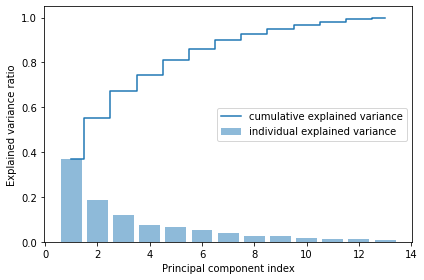

In [153]:
plt.bar(range(1, 14), var_exp, alpha=0.5, align='center',
        label = 'individual explained variance')
plt.step(range(1, 14), cum_ver_exp, where='mid',
         label = 'cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

랜덤 포레스트의 특성 중요도 : 클래스 소속 정보를 사용하여 노드의 불순도를 계산한다.

PCA : 비지도 학습 데이터의 분산, 특성 축을 따라 값들이 퍼진 정도를 측정한다.

###5.1.4 특성 변환

1. 고윳값이 가장 큰 k개의 고유 벡터를 선택하여 새로운 특성 부분 공간을 만들거다.

2. 최상위 k개의 고유 벡터로 투영 행렬 W를 만든다.

3. 투영 행렬 W를 사용해서 d차원 입력 데이터셋 X를 새로운 k차원의 특성 부분 공간으로 변환한다.

In [0]:
# (고윳값, 고유 벡터) 튜플의 리스트를 만들자.
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]
# 높은 값에서 낮은 값으로 (고윳값, 고유 벡터) 튜플을 정렬하자.
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

In [155]:
# 가장 큰 두 개의 고윳값에 해당하는 고유 벡터를 선택하자.
w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis]))
print(f'투영 행렬 W : \n{w}')

투영 행렬 W : 
[[-0.1372  0.503 ]
 [ 0.2472  0.1649]
 [-0.0255  0.2446]
 [ 0.2069 -0.1135]
 [-0.1544  0.2897]
 [-0.3938  0.0508]
 [-0.4174 -0.0229]
 [ 0.3057  0.0905]
 [-0.3067  0.0084]
 [ 0.0755  0.5498]
 [-0.3261 -0.2072]
 [-0.3686 -0.249 ]
 [-0.2967  0.3802]]


In [156]:
X_train_std[0].dot(w)

array([2.383 , 0.4546])

In [0]:
X_train_pca = X_train_std.dot(w)

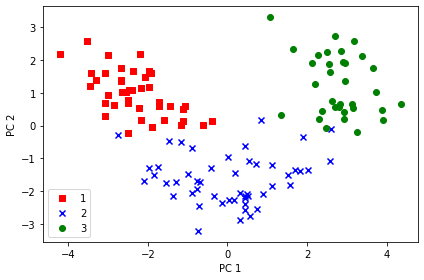

In [158]:
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y_train), colors, markers):
  plt.scatter(X_train_pca[y_train==l, 0],
              X_train_pca[y_train==l, 1],
              c=c, label=l, marker=m)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc = 'lower left')
plt.tight_layout()
plt.show()

x축은 첫번째 주성분, y축은 두번째 주성분이다. x축을 따라 더 넓게 퍼져 있는 것을 알 수 있다.

산점도를 그리기 위한 목적으로 클래스 레이블 정보를 인코딩했지만 PCA는 비지도 학습 기법이라는 것을 기억하자.

###5.1.5 사이킷런의 주성분 분석

In [0]:
from matplotlib.colors import ListedColormap

In [0]:
def plot_decision_regions(X, y, classifier, resolution=0.02):

  # 마커와 컬러맵 준비
  markers = ('s', 'x', 'o', '^', 'v')
  colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])

  # 결정 경계를 그리자
  x1_min, x1_max = X[:, 0].min() - 1 , X[:, 0].max() + 1
  x2_min, x2_max = X[:, 1].min() - 1 , X[:, 1].max() + 1
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
  Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  Z = Z.reshape(xx1.shape)
  plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())

  # 클래스 샘플을 표시하자.
  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0],
                y=X[y == cl, 1],
                alpha=0.6,
                c=cmap.colors[idx],
                edgecolor='black',
                marker=markers[idx],
                label=cl)  

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

In [162]:
lr = LogisticRegression(solver='liblinear', multi_class='auto')
lr.fit(X_train_pca, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

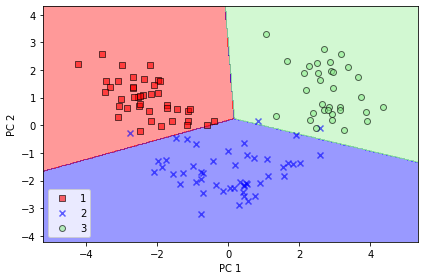

In [163]:
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

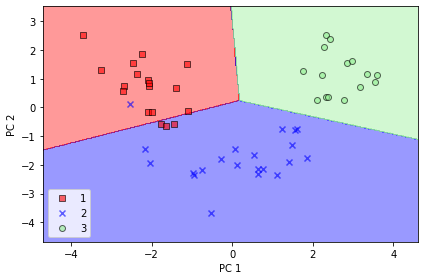

In [164]:
plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc = 'lower left')
plt.tight_layout()
plt.show()

In [165]:
# 전체 주성분의 설명된 분산 비율 알기
pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([0.3695, 0.1843, 0.1182, 0.0733, 0.0642, 0.0505, 0.0395, 0.0264,
       0.0239, 0.0163, 0.0138, 0.0117, 0.0082])

##5.2 선형 판별 분석을 통한 지도 방식의 데이터 압축

선형 판별 분석(Linear Discriminant Analysis, LDA)은 규제가 없는 모델에서 차원의 저주로 인한 과대적합 정도를 줄이고 계산 효율성을 높이기 위한 특성 추출의 기법이다.

PCA : 데이터셋에 있는 분산이 최대인 직교 성분 축을 찾는다.

LDA : 클래스를 최적으로 구분할 수 있는 특성 부분 공간을 찾는다.

###5.2.1 주성분 분석 vs 선형 판별 분석

PCA와 LDA 모두 데이터셋의 차원 개수를 줄일 수 있는 선형 변환 기법이다.

PCA : 비지도 학습, LDA : 지도 학습

###5.2.2 선형 판별 분석의 내부 동작 방식

LDA 수행에 필요한 주요 단계

1. d차원의 데이터셋을 표준화 전처리한다.

2. 각 클래스에 대해 d차원의 평균 벡터를 계산한다.

3. 클래스 간의 산포 행렬(scatter matrix) 과 클래스 내 산포 행렬을 구성한다.

4. 두 행렬의 고유 벡터와 고윳값을 계산한다.

5. 고윳값을 내림차순으로 정렬하여 고유 벡터의 순서를 매긴다.

6. 고윳값이 가장 큰 k개의 고유 벡터를 선택하여 d x k 차원의 변환 행렬 W를 구성한다. 이 행렬의 열이 고유 벡터다

7. 변환 행렬 W를 사용하여 샘플을 새로운 특성 부분 공간으로 투영한다.

행렬을 고윳값과 고유 벡터로 분해하여 새로운 저차원 특성 공간을 구성한다는 점에서 PCA와 유사하다. 단계 2에서 계싼하는 평균 벡터를 만드는 데 클래스 레이블 정보를 사용하는 것이 차이점이다.

###5.2.3 산포 행렬 계산

In [166]:
# 평균 벡터를 사용하여 클래스 간의 산포 행렬과 클래스 내 산포 행렬을 구성하자.
np.set_printoptions(precision=4)
mean_vecs = []
for label in range(1, 4):
  mean_vecs.append(np.mean(X_train_std[y_train==label], axis=0))
  print(f'MV {label} : {mean_vecs[label-1]}')

MV 1 : [ 0.9066 -0.3497  0.3201 -0.7189  0.5056  0.8807  0.9589 -0.5516  0.5416
  0.2338  0.5897  0.6563  1.2075]
MV 2 : [-0.8749 -0.2848 -0.3735  0.3157 -0.3848 -0.0433  0.0635 -0.0946  0.0703
 -0.8286  0.3144  0.3608 -0.7253]
MV 3 : [ 0.1992  0.866   0.1682  0.4148 -0.0451 -1.0286 -1.2876  0.8287 -0.7795
  0.9649 -1.209  -1.3622 -0.4013]


In [167]:
# 평균 벡터를 사용하여 클래스 내 산포행렬을 계산하고, 이 행렬의 개별 클래스 i의 산포 행렬을 더하여 구하자.
d = 13 # 특성 개수
S_W = np.zeros((d,d))
for label, mv in zip(range(1,4), mean_vecs):
  class_scatter = np.zeros((d,d))
  for row in X_train_std[y_train == label]:
    row, mv = row.reshape(d, 1), mv.reshape(d, 1)
    class_scatter += (row - mv).dot((row - mv).T)
  S_W += class_scatter
print(f'클래스 내의 산포 행렬 : {S_W.shape[0], S_W.shape[1]}')

클래스 내의 산포 행렬 : (13, 13)


In [168]:
print(f'클래스 레이블 분포 : {np.bincount(y_train)[1:]}')

클래스 레이블 분포 : [41 50 33]


In [169]:
# 개별 산포 행렬을 산포 행렬로 모두 더하기 전에 스케일 조정을 해야 한다.
d = 13 # 특성 개수
S_W = np.zeros((d,d))
for label, mv in zip(range(1,4), mean_vecs):
  class_scatter = np.cov(X_train_std[y_train==label].T, bias=True)
  S_W += class_scatter
print(f'스케일 조정된 클래스 내의 산포 행렬 : {S_W.shape[0], S_W.shape[1]}')

스케일 조정된 클래스 내의 산포 행렬 : (13, 13)


In [170]:
# 클래스 내 산포 행렬(또는 공분산 행렬)을 계산한 후 다음 단계로 넘어가 클래스 간의 산포 행렬을 계산하자.
mean_overall = np.mean(X_train_std, axis=0)
mean_overall = mean_overall.reshape(d, 1) # 열 벡터로 만들기
d = 13 # 특성 개수
S_B = np.zeros((d,d))
for i, mean_vec in enumerate(mean_vecs):
  n = X_train[y_train == i+1, :].shape[0]
  mean_vec = mean_vec.reshape(d,1) # 열 벡터로 만들기
  S_B += n * (mean_vec - mean_overall).dot(
      (mean_vec - mean_overall).T)
print(f'클래스 간의 산포 행렬 : {S_B.shape[0], S_B.shape[1]}')

클래스 간의 산포 행렬 : (13, 13)


###5.2.4 새로운 특성 부분 공간을 위해 선형 판별 벡터 선택

In [171]:
# 공분산 행렬에 대한 고윳값 분해를 수행하는 대신 행렬의 고유값을 계산하자
eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

# 고유 벡터와 고윳값 쌍을 계산한 후 내림차순으로 고윳값을 정렬하자.
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]
eigen_pairs = sorted(eigen_pairs, key=lambda k: k[0], reverse=True)

print(f'내림차순의 고윳값')
for eigen_val in eigen_pairs:
  print(eigen_val[0])

내림차순의 고윳값
358.0042070133659
177.07768640666225
2.842170943040401e-14
2.2513016031041443e-14
1.800270811737676e-14
1.800270811737676e-14
1.578515719598725e-14
1.3662940131811948e-14
1.3662940131811948e-14
9.798790178197109e-15
9.798790178197109e-15
2.90135780637586e-15
9.905045812450375e-16


LDA에서 선형 판별 벡터는 최대 c-1개다. c는 클래스 레이블의 개수이다.

클래스 내 산포 행렬이 랭크(rank) 1 또는 그 이하인 c개의 행렬을 한한 것이기 때문이다. 클래스별 평균 벡터인 mean_vec을 (13, 1) 크기의 열 벡터로 만든 후 외적을 하여 (13, 13) 행렬을 만들었다. 이 행렬은 행과 열이 같은 배수로 증가하기 때문에 최대 랭크가 1이다. 마지막 클래스의 평균 벡터는 다른 클래스의 평균 벡터에 종속적이므로 전체 산포 행렬의 랭크는 c-1이 된다.

드물게 완벽하게 공선성을 가지는 경우(모든 샘플이 동일 선상에 위치한 경우) 공분산 행렬의 랭크는 1이다. 이때는 0이 아닌 고윳값을 가진 고유 벡터가 하나만 만들어진다.

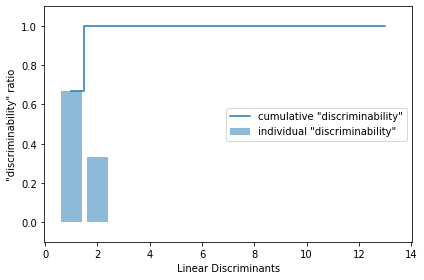

In [172]:
tot = sum(eigen_vals.real)
discr = [(i / tot) for i in sorted(eigen_vals.real, reverse=True)]
cum_discr = np.cumsum(discr)
plt.bar(range(1,14), discr, alpha=0.5, align='center',
        label='individual "discriminability"')
plt.step(range(1,14), cum_discr, where='mid',
         label='cumulative "discriminability"')
plt.ylabel('"discriminability" ratio')
plt.xlabel('Linear Discriminants')
plt.ylim([-0.1, 1.1])
plt.legend(loc='best')
plt.tight_layout()
plt.show()

처음 두 개의 선형 판별 벡터가 Wine 데이터셋 에 있는 정보 중 거의 100%를 잡아낸다.

두 개의 판별 고유 벡터를 열로 쌓아서 변환 행렬 W를 만들어 보자.

In [173]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis].real,
               eigen_pairs[1][1][:, np.newaxis].real))
print(f'행렬 W: \n {w}')

행렬 W: 
 [[-0.1484 -0.4093]
 [ 0.091  -0.1583]
 [-0.0168 -0.3536]
 [ 0.1487  0.322 ]
 [-0.0165 -0.0813]
 [ 0.1912  0.0841]
 [-0.7333  0.2828]
 [-0.0751 -0.0099]
 [ 0.002   0.0902]
 [ 0.2953 -0.2168]
 [-0.0327  0.274 ]
 [-0.3539 -0.0133]
 [-0.3918 -0.5954]]


###5.2.5 새로운 특성 공간으로 샘플 투영

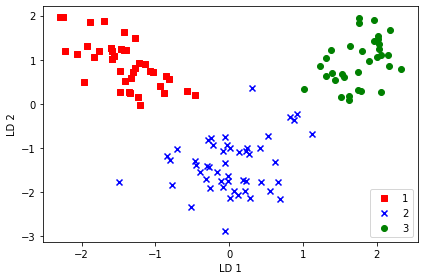

In [174]:
X_train_lda = X_train_std.dot(w)
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y_train), colors, markers):
  plt.scatter(X_train_lda[y_train==l, 0],
              X_train_lda[y_train==l, 1] * (-1),
              c=c, label=l, marker=m)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

###5.2.6 사이킷런의 LDA

In [0]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train)

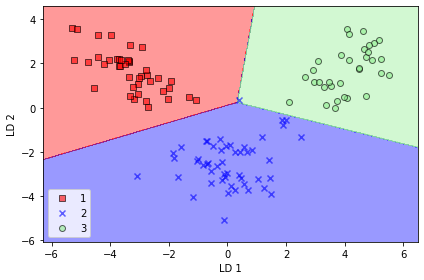

In [176]:
lr = LogisticRegression(solver='liblinear', multi_class='auto')
lr = lr.fit(X_train_lda, y_train)
plot_decision_regions(X_train_lda, y_train, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

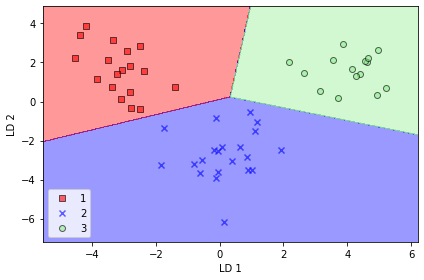

In [177]:
X_test_lda = lda.transform(X_test_std)
plot_decision_regions(X_test_lda, y_test, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

이전 절에서 단계별로 설명한 LDA 구현은 LinearDiscriminantAnalysis 클래스의 solver 매개변수가 'eigen'일 때이다. 실제 사이킷런의 LDA 구현은 책과는 조금 다르다.

In [178]:
y_nuiq, y_count = np.unique(y_train, return_counts=True)
priors = y_count / X_train_std.shape[0]
priors

array([0.3306, 0.4032, 0.2661])

In [0]:
s_w = np.zeros((X_train_std.shape[1], X_train_std.shape[1]))
for i, label in enumerate(y_nuiq):
  s_w += priors[i] * np.cov(X_train_std[y_train == label].T, bias=True)

In [0]:
s_b = np.zeros((X_train_std.shape[1], X_train_std.shape[1]))
for i, mean_vec in enumerate(mean_vecs):
  n = X_train_std[y_train == i + 1].shape[0]
  mean_vec = mean_vec.reshape(-1, 1)
  s_b += priors[i] * (mean_vec - mean_overall).dot((mean_vec - mean_overall).T)

In [0]:
import scipy
ei_val, ei_vec = scipy.linalg.eigh(s_b, s_w)
ei_vec = ei_vec[:, np.argsort(ei_val)[::-1]]
ei_vec /= np.linalg.norm(ei_vec, axis=0)

In [182]:
lda_eigen = LDA(solver='eigen')
lda_eigen.fit(X_train_std, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='eigen', store_covariance=False, tol=0.0001)

In [183]:
np.allclose(s_w, lda_eigen.covariance_)

True

In [187]:
Sb =np.cov(X_train_std.T, bias=True) - lda_eigen.covariance_
np.allclose(Sb, s_b)

True

In [189]:
np.allclose(lda_eigen.scalings_[:, :2], ei_vec[:, :2])

False

In [190]:
np.allclose(lda_eigen.transform(X_test_std), np.dot(X_test_std, ei_vec[:, :2]))

False

##5.3 커널 PCA를 사용하여 비선형 매핑

PCA, LDA 같은 차원 축소를 위한 선형 변환 기법은 비선형 문제에서 최선의 선택이 아니다.

이 절에서 PCA의 커널화 버전 또는 KPCA를 다룬다.

###5.3.1 커널 함수와 커널 트릭

커널 PCA를 통한 비선형 매핑을 수행하여 데이터를 고차원 공간으로 변환한다.

그다음 고차원 공간에 표준 PCA를 사용하여 샘플이 선형 분류기로 구분될 수 있는 저차원 공간으로 데이터를 투영한다.(샘플이 이 입력 공간에서 잘 구분도리 수 있다고 가정한다.)

이 방식의 단점은 계산 비용이 매우 비싸다는 것인데, 해결하기 위해 커널 트릭(kernel trick)을 사용한다. 커널 트릭을 사용하면 원본 특성 공간에서 두 고차원 특성 벡터의 유사도를 계산할 수 있다.

커널 트릭을 사용하면 고유 벡터를 명시적으로 계산할 필요가 없다. 커널 PCA로 얻은 것은 표준 PCA 방식에서처럼 투영 행렬을 구성한 것이 아니고 각각의 성분에 이미 투영된 샘플이다. 커널 함수는 두 벡터 사이의 점곱을 계산할 수 있는 함수고 유사도를 측정할 수 있는 함수다.

널리 사용되는 커널은 다음고 같다.
+ 다항 커널

+ 하이퍼볼릭 탄젠트(hyperbolic tangent) (시그모이드(sigmoid)) 커널

+ 방사 기저 함수(Radial Basis Function, RBF)

RBF 커널 PCA를 구현하기 위해 다음 세 단계를 정의한다.

1. 커널 (유사도) 행렬 K를 계산한다. 예를 들어 100개의 훈련 샘플이 담긴 데이터셋이라면 각 쌍의 유사도를 담은 대칭 커널 행렬은 100 x 100 차원이 된다.

2. 커널 행렬 K를 중앙에 맞춘다.

3. 고윳값 크기대로 내림차순을 정렬하여 중앙에 맞춘 커널 행렬에서 최상위 k개의 고유 벡터를 고른다. 표준 PCA와 다르게 고유 벡터는 주성분 축이 아니며, 이미 이 축에 투영된 샘플이다.

두 번째 단계에서 커널 행렬을 중앙에 맞추는 이유는 다음과 같다. 표준화 전처리된 데이터를 다룬다고 가정하는데, 공분산 행렬을 구성하고 비선형 특성 조합으로 점곱을 비선형 매핑 함수를 사용한 비선형 특성 조합으로 접곰을 대체할 때 사용한 모든 특성의 평균이 0이다. 반면 새로운 특성 공간을 명시적으로 계산하지 않기 때문에 이 특성 공간이 중아에 맞추어져 있느지 보장할 수 없다. 이것이 커널 행렬의 중앙을 맞추는 것이 필요한 이유다.

In [0]:
# 커널을 중앙에 맞추기
# from sklearn.preprocessing import KernelCenterer
# K_centered = KernelCenterer().fit_transform(K)

###5.3.2 파이썬으로 커널 PCA 구현

In [0]:
from scipy.spatial.distance import pdist, squareform
from scipy import exp
from scipy.linalg import eigh
import numpy as np

In [0]:
def rbf_kernel_pca(X, gamma, n_components):
  """
  RBF 커널 PCA 구현

  매개변수
  ----------
  X: {넘파이 ndarray}, shape = [n_samples, n_featrues]

  gamma: float
    RBF 커널 튜닝 매개변수

  n_components: int
    반환할 주성분 개수

  반환값
  ----------
  X_pc: {넘파이 ndarray}, shape = [n_samples, k_features]
    투영된 데이터셋

  """
  # MxN 차원의 데이터셋에서 샘플 간의 유클리디안 거리의 제곱을 계산한다.
  sq_dists = pdist(X, 'sqeuclidean')

  # 샘플 간의 거리를 정방 대칭 행렬로 변환한다.
  mat_sq_dists = squareform(sq_dists)

  # 커널 행렬을 계산한다.
  K = exp(-gamma * mat_sq_dists)

  # 커널 행렬을 중앙에 맞춘다.
  N = K.shape[0]
  one_n = np.ones((N,N)) / N
  K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)

  # 중앙에 맞춰진 커널 행렬의 고윳값과 고유 벡터를 구한다.
  # scipy.linalg.eigh 함수는 오름차순으로 반환한다.
  eigvals, eigvecs = eigh(K)
  eigvals, eigvecs = eigvals[::-1], eigvecs[:, ::-1]

  # 최상위 k개의 고유 벡터를 선택한다.(투영 결과)
  X_pc = np.column_stack([eigvecs[:, i] for i in range(n_components)])

  return X_pc

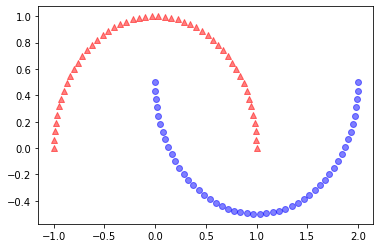

In [195]:
# 예제 1: 반달 모양 구분하기
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, random_state=123)
plt.scatter(X[y==0, 0], X[y==0, 1],
            color='red', marker='^', alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1],
            color='blue', marker='o', alpha=0.5)
plt.show()

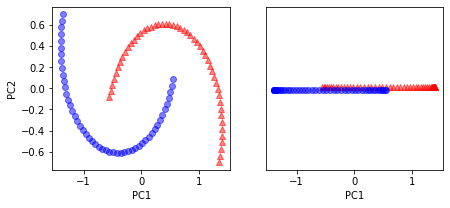

In [200]:
# 커널 PCA로 반달 모양을 펼쳐서 선형 분류기에 적합한 입력 데이터셋으로 만들자.
# 일단 먼저 기본 PCA 부터
from sklearn.decomposition import PCA
scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7,3))
ax[0].scatter(X_spca[y==0, 0], X_spca[y==0, 1],
              color='red', marker='^', alpha=0.5)
ax[0].scatter(X_spca[y==1, 0], X_spca[y==1, 1],
              color='blue', marker='o', alpha=0.5)
ax[1].scatter(X_spca[y==0, 0], np.zeros((50, 1))+0.02,
              color='red', marker='^', alpha=0.5)
ax[1].scatter(X_spca[y==1, 0], np.zeros((50,1))-0.02,
              color='blue', marker='o', alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.show()

기본 PCA로는 선형적으로 구분하기 어렵다.

PCA는 비지도 학습 방법임을 기억하자. LDA는 클래스 레이블 정보를 사용하지만 PCA는 아니다. 여기서는 구분이 잘 되는지를 나타내기 위해 시각적 효과의 목적으로 레이블이 추가된 것이다.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead


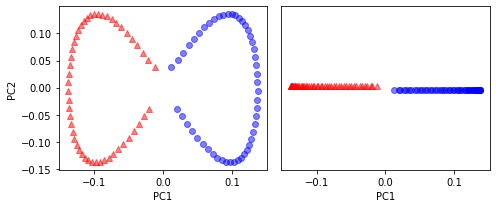

In [202]:
# 앞에서 만든 커널 PCA 함수 rbf_kernel_pca를 적용해보자.
X_kpca = rbf_kernel_pca(X, gamma=15, n_components=2)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7,3))
ax[0].scatter(X_kpca[y==0, 0], X_kpca[y==0, 1],
              color='red', marker='^', alpha=0.5)
ax[0].scatter(X_kpca[y==1, 0], X_kpca[y==1, 1],
              color='blue', marker='o', alpha=0.5)
ax[1].scatter(X_kpca[y==0, 0], np.zeros((50,1))+0.02,
              color='red', marker='^', alpha=0.5)
ax[1].scatter(X_kpca[y==1, 0], np.zeros((50,1))-0.02,
              color='blue', marker='o', alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.tight_layout()
plt.show()

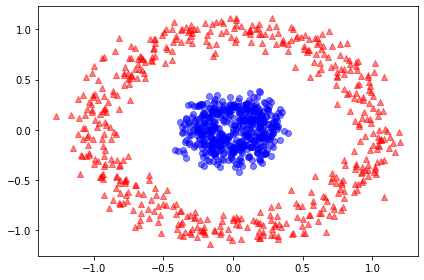

In [204]:
# 예제 2: 동심원 분리하기
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=1000,
                    random_state=123, noise=0.1, factor=0.2)
plt.scatter(X[y==0, 0], X[y==0, 1],
            color='red', marker='^', alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1],
            color='blue', marker='o', alpha=0.5)
plt.tight_layout()
plt.show()

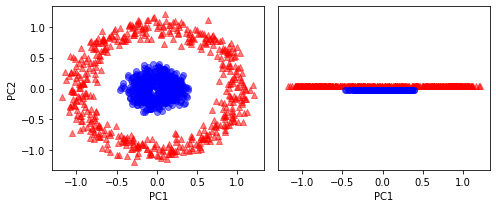

In [205]:
# 기본 PCA 부터 적용해보자
scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7,3))
ax[0].scatter(X_spca[y==0, 0], X_spca[y==0, 1],
              color='red', marker='^', alpha=0.5)
ax[0].scatter(X_spca[y==1, 0], X_spca[y==1, 1],
              color='blue', marker='o', alpha=0.5)
ax[1].scatter(X_spca[y==0, 0], np.zeros((500,1))+0.02,
              color='red', marker='^', alpha=0.5)
ax[1].scatter(X_spca[y==1, 0], np.zeros((500,1))-0.02,
              color='blue', marker='o', alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead


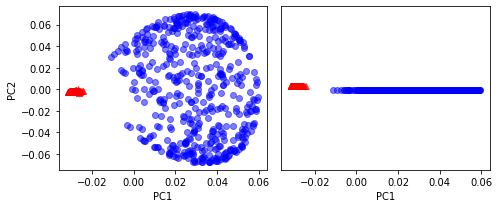

In [207]:
# 커널 PCA 를 적용해보자
X_kpca = rbf_kernel_pca(X, gamma=15, n_components=2)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7,3))
ax[0].scatter(X_kpca[y==0, 0], X_kpca[y==0, 1],
              color='red', marker='^', alpha=0.5)
ax[0].scatter(X_kpca[y==1, 0], X_kpca[y==1, 1],
              color='blue', marker='o', alpha=0.5)
ax[1].scatter(X_kpca[y==0, 0], np.zeros((500,1))+0.02,
              color='red', marker='^', alpha=0.5)
ax[1].scatter(X_kpca[y==1, 0], np.zeros((500,1))-0.02,
              color='blue', marker='o', alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.tight_layout()
plt.show()

###5.3.3 새로운 데이터 포인트 투영

In [0]:
from scipy.spatial.distance import pdist, squareform
from scipy import exp
from scipy.linalg import eigh
import numpy as np

In [0]:
def rbf_kernel_pca(X, gamma, n_components):
  """
  RBF 커널 PCA 구현

  매개변수
  ----------
  X: {넘파이 ndarray}, shape = [n_samples, n_featrues]

  gamma: float
    RBF 커널 튜닝 매개변수

  n_components: int
    반환할 주성분 개수

  반환값
  ----------
  alphas: {넘파이 ndarray}, shape = [n_samples, k_features]
    투영된 데이터셋

  lambdas: list
    고유값
    
  """
  # MxN 차원의 데이터셋에서 샘플 간의 유클리디안 거리의 제곱을 계산한다.
  sq_dists = pdist(X, 'sqeuclidean')

  # 샘플 간의 거리를 정방 대칭 행렬로 변환한다.
  mat_sq_dists = squareform(sq_dists)

  # 커널 행렬을 계산한다.
  K = exp(-gamma * mat_sq_dists)

  # 커널 행렬을 중앙에 맞춘다.
  N = K.shape[0]
  one_n = np.ones((N,N)) / N
  K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)

  # 중앙에 맞춰진 커널 행렬의 고윳값과 고유 벡터를 구한다.
  # scipy.linalg.eigh 함수는 오름차순으로 반환한다.
  eigvals, eigvecs = eigh(K)
  eigvals, eigvecs = eigvals[::-1], eigvecs[:, ::-1]

  # 최상위 k개의 고유 벡터를 선택한다.(투영 결과)
  alphas = np.column_stack([eigvecs[:, i] for i in range(n_components)])

  # 고유 벡터에 상응하는 고윳값을 선택한다.
  lambdas = [eigvals[i] for i in range(n_components)]

  return alphas, lambdas

In [212]:
X, y = make_moons(n_samples=100, random_state=123)
alphas, lambdas = rbf_kernel_pca(X, gamma=15, n_components=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead


In [213]:
x_new = X[25]
x_new

array([1.8713, 0.0093])

In [214]:
x_proj = alphas[25]
x_proj

array([0.0788])

In [0]:
def project_x(x_new, X, gamma, alphas, lambdas):
  pair_dist = np.array([np.sum((x_new-row)**2) for row in X])
  k = np.exp(-gamma * pair_dist)
  return k.dot(alphas / lambdas)

In [216]:
x_reproj = project_x(x_new, X, gamma=15, alphas=alphas, lambdas=lambdas)
x_reproj

array([0.0788])

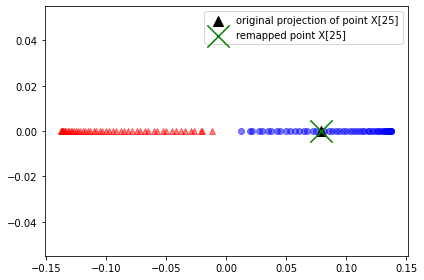

In [217]:
plt.scatter(alphas[y==0, 0], np.zeros((50)),
            color='red', marker='^', alpha=0.5)
plt.scatter(alphas[y==1, 0], np.zeros((50)),
            color='blue', marker='o', alpha=0.5)
plt.scatter(x_proj, 0, color='black',
            label='original projection of point X[25]',
            marker='^', s=100)
plt.scatter(x_reproj, 0, color='green',
            label='remapped point X[25]',
            marker='x', s=500)
plt.legend(scatterpoints=1)
plt.tight_layout()
plt.show()

###5.3.4 사이킷런의 커널 PCA

In [0]:
from sklearn.decomposition import KernelPCA
X, y = make_moons(n_samples=100, random_state=123)
scikit_kpca = KernelPCA(n_components=2,
                        kernel='rbf', gamma=15)
X_skernpca = scikit_kpca.fit_transform(X)

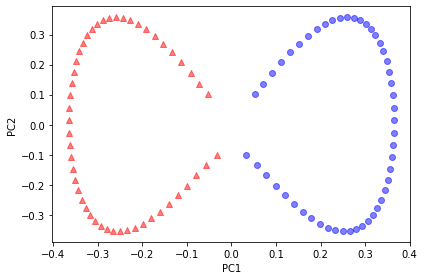

In [219]:
plt.scatter(X_skernpca[y==0, 0], X_skernpca[y==0, 1],
            color='red', marker='^', alpha=0.5)
plt.scatter(X_skernpca[y==1, 0], X_skernpca[y==1, 1],
            color='blue', marker='o', alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.tight_layout()
plt.show()

##5.4 요약

+ 기본 PCA : 클래스 레이블을 사용하지 않고 직교하는 특성 축을 따라 분산이 최대가 되는 저차원 부분 공간으로 데이터를 투영한다.

+ LDA : 지도 학습 방법의 차원 축소 기법이다. 클래스 정보를 사용하여 선형 특성 공간에서 클래스 구분 능력을 최대화한다.

+ 커널  PCA : 커널 트릭과 코차원 특성 공간으로의 가상 투영을 통하여 비선형 특성을 가진 데이터셋을 저차원 부분 공간으로 극적으로 압축한다. 이 부분 공간에서 클래스는 선형적으로 구분된다.